# Seminar 4.1: Bertrand modell med kapasitetsbegrensninger

In [1]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

## Bertrand modell med kapasitetsbegrensninger

I dette seminaret skal vi se på en variant av Bertrand-modellen hvor vi har kapasitetsbegrensninger. Vi skal se på en modell hvor to bedrifter konkurrerer om å selge et homogent produkt hvor de har en kapasitetsbegrensning på hvor mye de kan produsere. Markedet vi bruker som eksempel er Tromsø Alpinpark og Målselv Fjellandsby.

Vi antar vi har en etterspørsel gitt ved:

$$
Q = 6000 - 60P
$$

Hvor $Q$ er mengden solgt og $P$ er prisen. Vi antar at bedriftene har en konstant marginalkostnad på 10 og at de har en kapasitetsbegrensning på 1800 for hvert anlegg. Dette betyr at de maksimalt kan produsere 1800 "enheter". Og dersom de produserer mer enn dette vil de få en ekstra kostnad på 10 per enhet over 1800. Videre antar vi også at $P$ er lik $c$ for begge bedriftene, dvs at prisen er lik marginalkostnaden, og at vi har en Nash-likevekt.

In [2]:
# Definerer symboler
Q_T,Q_M, P_T,P_M,Q,P = sp.symbols('Q_T Q_T_ P_T P_M Q P', real=True, positive=True)

# Definerer etterspørselfunksjonen

Etterspørsel = sp.Eq(Q, 6000-60*P)

display(Etterspørsel)

Eq(Q, 6000 - 60*P)

Siden vi vet at prisen er lik marginalkostnaden kan vi sette $P = MC = 10$ og løse for mengden som produseres av hver bedrift. Da får vi:

$$
Q = 6000 - 60 \cdot 10 = 5400
$$

Optimalt kvantum er langt over kapasitetsbegrensningen, som er på $2 \cdot 1800 = 3600$, og optimal pris vil være høyere enn 10. Dette betyr at vi må finne en annen måte å løse problemet på.

In [3]:
c = 10

# Substituerer inn MC i etterspørselsfunksjonen
P_løsning_uten_kapasitetsbegrensing = Etterspørsel.subs(P,c)

P_løsning_uten_kapasitetsbegrensing

Eq(Q, 5400)

## Residual etterspørsel

Før vi kan løse modellen må vi finne residual etterspørsel. Residual etterspørsel er etterspørselen etter et produkt gitt at prisen på produktet er lik prisen til en av konkurrentene. For å finne residual etterspørsel trekker vi fra etterspørselen til konkurrenten fra total etterspørsel. For Tromsø Alpinpark blir residual etterspørsel:

$$
Q_{T} = (6000 - Q_{M}) - 60P_{T} 
$$

$$
Q_{T} = 6000 - 1800 - 60P_{T}
$$

$$
Q_{T} = 4200 - 60P_{T}
$$

Vi har nå funnet residual etterspørsel for Tromsø Alpinpark. Hvis vi nå løser for pris får vi:

$$
P_{T} = \frac{4200 - Q_{T}}{60}
$$

$$
P_{T} = 70 - \frac{Q_{T}}{60}
$$

Nå kan vi gjøre som vi pleier, vi har funnet prisen men må finne total inntekten. Total inntekt er lik pris ganget med kvantum, altså:

$$
TR_{T} = 70 - \frac{Q_{T}}{60} \cdot Q_{T} = 70Q_{T} - \frac{Q_{T}^2}{60}
$$

For å finne marginalinntekten deriverer vi total inntekt med hensyn på kvantum:

$$
MR_{T} = \frac{dTR_{T}}{dQ_{T}} = 70 - \frac{2Q_{T}}{60}
$$


Setter vi marginalinntekten lik marginalkostnaden får vi:

$$
70 - \frac{2Q_{T}}{60} = 10
$$

Løser for $Q$ og optimalt kvantum blir:

$$
Q_{T}^* = 1800
$$

Løser for $P$ og optimal pris blir:

$$
P_{T}^* = 40
$$

In [4]:
# Definerer etterspørselsfunksjonen med kapasitetsbegrensing
Etterspørsel_med_kapasitetsbegrensing = sp.Eq(Q_T, (6000-Q_M)-60*P_T)

Etterspørsel_med_kapasitetsbegrensing

Eq(Q_T, -60*P_T - Q_T_ + 6000)

In [5]:
# Substituerer inn kapaistetsbegrensing i etterspørselsfunksjonen
Q_løsning_med_kapasitetsbegrensing = Etterspørsel_med_kapasitetsbegrensing.subs(Q_M,1800)

Q_løsning_med_kapasitetsbegrensing

Eq(Q_T, 4200 - 60*P_T)

In [6]:
# Løser for prisen
P_løsning_med_kapasitetsbegrensing = sp.solve(Q_løsning_med_kapasitetsbegrensing,P_T)[0]

display(P_løsning_med_kapasitetsbegrensing)

70 - Q_T/60

In [7]:
# Finner total inntekt
TR = P_løsning_med_kapasitetsbegrensing*Q_T
TR

Q_T*(70 - Q_T/60)

In [8]:
# Deriverer total inntekt for å finne marginal inntekt
MR = TR.diff(Q_T)
MR

70 - Q_T/30

In [9]:
# Setter marginalinntekt lik marginalkostnad, marginalkostnad er lik prisen = 10
likevekt_T = sp.Eq(MR,c)

likevekt_T

Eq(70 - Q_T/30, 10)

In [10]:
# Løser for kvantum
Q_løsning_med_kapasitetsbegrensing = sp.solve(likevekt_T,Q_T)[0]

Q_løsning_med_kapasitetsbegrensing

1800

In [11]:
# Løser for optimal pris
P_løsning_med_kapasitetsbegrensing = P_løsning_med_kapasitetsbegrensing.subs(Q_T,Q_løsning_med_kapasitetsbegrensing)

P_løsning_med_kapasitetsbegrensing

40

## Visualisering av modellen

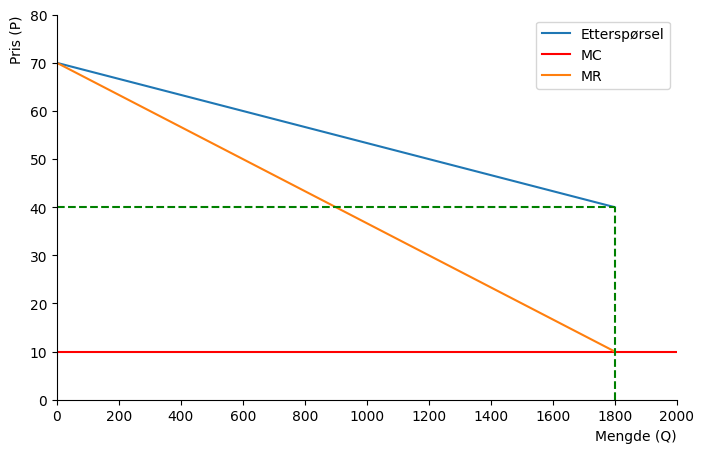

In [12]:
# Invers etterspørsel har vi regnet ut tidligere
def invers_etterspørsel(a, b, Q):
    return a - (Q/b)
# Marginalinntekt er den deriverte av totalinntekten
def MR(a, b, Q):
    return a - 2*(Q/b)

MC = 10
#Q-verdier
Q = np.linspace(0.001, 1800, 1000)

#funksjon for å skape akse
def create_ax():
                fig, ax = plt.subplots(figsize=(8, 5))
                ax.set_ylabel('Pris (P)', loc='top', rotation=90)
                ax.set_xlabel('Mengde (Q)', loc='right')
                ax.spines['top'].set_color('none')
                ax.spines['right'].set_color('none')
                return fig, ax
            
fig, ax = create_ax()
ax.plot(Q, invers_etterspørsel(70, 60, Q), label='Etterspørsel')
# Plotter marginalkostnaden
ax.axhline(y=10, color='r', label='MC')
# Plotter marginalinntekt
ax.plot(Q, MR(70, 60, Q), label='MR')

ax.set(xlim=(0, 2000))
ax.set(ylim=(0, 80))

# h og vlines til likevekt
ax.vlines(x=Q_løsning_med_kapasitetsbegrensing, ymin=0, ymax=P_løsning_med_kapasitetsbegrensing, color='g', linestyle='--')
ax.hlines(y=P_løsning_med_kapasitetsbegrensing, xmin=0, xmax=Q_løsning_med_kapasitetsbegrensing, color='g', linestyle='--')

# fix x-ticks
ax.set_xticks(np.arange(0, 2200, 200))

ax.legend();
